<a href="https://colab.research.google.com/github/ncadavia/OPI_Analytics_/blob/main/OPI_Analytics_SeccionB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Sección B </center>

<u>**Primera proximación:**</u>

Si entendemos por **demanda** de paletas para una máquina expendedora dada, la cantidad de paletas que se venden en un determinado período de tiempo. Inicialmente, haría un análisis exploratorio de datos con el objetivo de detectar patrones por **cada una** de las máquinas expendedoras. A continuación, dependiendo del tipo de demanda que encuentre para cada expendedora entraría a evaluar que posible sistema de renovación de inventarios aplicar. 

Ahora, la cantidad de paletas demandadas está determinada por factores controlables o no, por La Michoacana. Dichos factores determinan el comportamiento o patrón de demanda en el tiempo, por lo tanto, es importante determinar con los datos de Luis, para cada una de las máquinas, si:

**1.** **La demanda de paletas es constante**: en número de paletas vendidas tienen un comportamiento estable a lo largo del tiempo:

Si estuviéramos en un caso de estos, podríamos intentar responder cuándo surtir y cuánto surtir usando la teoría del *lote económico de compra*, la cual nos proporciona la siguiente relación

$$ CT = CO + CE,$$

donde:
* $CT$: costo total,
* $CO$: costo de transporte (100) y
* $CE$: costo de energía necesaria para mantener las paletas


Si consideramos las siguientes variables:
* $D$: demanda total anual,
* $CO$: costo de transporte,
* $i$: costo anual de mantener paletas y
* $q$: cantidad a surtir

El costo total de compra puede también quedar expresado de la siguiente manera:
$$CT = D + (D/q) * CO + i * q/2$$

El costo total toma el menor valor cuando  consideramos la derivada $d(CT)/dq = 0$, esto es, para el siguiente valor de $q$:

$$q* = \sqrt{2 * D* CO/ i},$$
en otras palabras, $q*$ nos indica aquella cantidad que hace mínima la suma de los costos de transporte y de energía.

Por otro lado, el mismo modelo nos sugiere que el mejor momento para surtir es cuando el nivel de stock sea igual al punto de reorden ($R$), definido como
$$R = (\mbox{demanda promedio}) * (\mbox{tiempo de transporte})$$
Sin embargo, para nuestro caso, el tiempo de transporte es el mismo día, por lo que lo consideramos como $1$.
Es decir el mejor momento para pedir es cuando el stock es igual a la demanda promedio.




**2.** **La demanda de paletas es aleatoria (sin tendencias ni estacionalidades):** 



Aquí, con $\mu$, la demanda promedio de paletas,

$$\mu = \frac{\sum_{i=1}^{n}x_i}{n}: \mbox{media aritmética de los datos de la demanda}$$
y $s$, la distancia media entre los datos y la demanda promedio de paletas,

$$s = \sqrt{\frac{\sum\left(x_i - \mu\right)^2}{n-1}}: \mbox{desviación estándar}.$$

Si estuviéramos en un caso de estos, podríamos intentar responder cuándo surtir y cuánto surtir usando la *lógica de nivel objetivo* o *sistema de revisión periódica* o *sistema P*. Esto dado que se realiza una revisión de las paletas disponibles diariamente ($T$).  Con este sistema se surten paletas por la
diferencia entre un máximo $M$ y la cantidad $q$ en stock al momento de la revisión.






**3.** **La demanda de paletas es aleatoria (con tendencias y estacionalidad):** 

Ahora, cuando la demanda de paletas en una máquina dada sigue un patrón estacional significativo, la literatura reporta que, el *lote económico de compra* no siempre proporcionará la solución óptima y en ocasiones puede conducir a aumentar costos, por lo cual es recomendado hacer ajustes a $q*$ en términos de la demanda. 







Una vez definidos el tipo de renovación de inventarios a aplicar, otras consideraciones deben ser tomadas con el ánimo de reducir costos:

Por ejemplo, si la capacidad de las máquina que voy a surtir es inferior a 100, ¿me conviene más surtir al tope de la capacidad de esta?


<u> **Segunda aproximación:**</u>
Con los datos históricos estudiar para cada máquina expendedora la estacionalidad de los datos (esto dado que uno esperaría mayor demanda de helados en meses calurosos). Luego implementaría modelos de pronóstico para la demanda de paletas, por ejemplo un modelo SARIMA,  basándome en esos pronósticos, definiría una función de costo y la optimizaría. 

<u>**Tercera aproximación:**</u>
Por cada máquina expendedora crearía un modelo siguiendo los siguientes pasos: 

**1.**   Definir con los datos históricos un umbral de disponibilidad promedio de paletas. Cuando la disponibilidad en un registro sea $0$, cambiar tal valor por el número de paletas retiradas.
**2.**   Como en principio, para cada máquina se tiene un DataFrame desde el día $1$ en que se instaló la máquina expendedora, este debe lucir así:

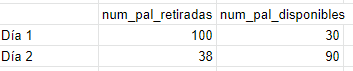

Por lo tanto, es posible determinar cuántas paletas fueron surtidas por día

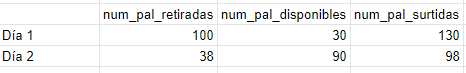


Considerando el DataFrame en la columna `pal_surtidas`, podemos entonces definir un pipeline que consista de (i) una regresión que prediga el número de paletas disponibles `num_pal_disponibles`, usando como variables predictoras el número de paletas retiradas `num_pal_retiradas` y el número de paletas surtidas `num_pal_surtidas` y (ii) un árbol de decisión que clasifique si la predicción es $0$ o $1$, donde 

$0$: la predicción es mayor o igual que el umbral de disponibilidad promedio de paletas y por tanto no se surtirá y

$1$: la predicción es menor que el umbral de disponibilidad promedio de paletas y por tanto se surtirá.



**3.** Hacer pronóstico con el histórico de datos para la demanda de paletas, por ejemplo un modelo SARIMA, y de acuerdo con el resultado en **2** surtir o no la cantidad pronósticada.


